### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


In [2]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [1]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

    100% |████████████████████████████████| 20.0MB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
The scikit-learn version is 0.24.2.


In [1]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [3]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

    100% |████████████████████████████████| 1.6MB 11.8MB/s ta 0:00:01


# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
# Load in the general demographics data.
df_general = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
df_general.head(5)



,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
# The number of rows and columns
df_general.shape

(891221, 85)

In [6]:
# Print out the demo_data general information 
df_general.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,817722.000000,817722.000000,891221.000000,891221.000000,817722.000000,817722.000000,817722.000000,872873.000000,306609.000000,783619.000000,817722.000000,798073.000000,794213.000000,798073.000000,817252.000000,798073.000000,798073.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,797481.000000,797481.000000,797481.000000,798066.000000,770025.000000,757897.000000,886367.000000,770025.000000,785421.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,3.790586,1101.178533,7.350304,0.196612,1.792102,14.622637,4.453621,3.599574,2.185966,4.791151,2.432575,1.026827,8.154346,3.419630,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,1.266967,0.008423,0.003483,1.197852,3.362438,10.864126,1.727637,0.004162,4.207243,3.410640,3.933406,7.908791,8.287263,0.040647,2.798641,3.018452,1993.277011,4.052836,1.494277,1.265584,0.624525,0.305927,1.389552,3.158580,4.153043,3.939172,4.549491,3.738306,2.592991,2.963540,2.698691,4.257967,619.701439,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,1.987876,976.583551,3.525723,0.397437,1.269062,12.616883,3.855639,3.926486,1.756537,3.425305,1.474315,0.586634,4.844532,1.417741,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,1.287435,0.091392,0.084957,0.952532,1.352704,7.639683,1.155849,0.068855,1.624057,1.628844,1.964701,1.923137,15.628087,0.324028,2.656713,1.550312,3.332739,1.949539,1.403961,1.245178,1.013443,0.638725,1.779483,1.329537,2.183710,1.718996,2.028919,0.923193,1.119052,1.428882,1.521524,2.030385,340.034318,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [7]:
# Print out the information from the feat_info
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [8]:
# Check to see the proportion of natural missing values in the df_general dataset:
# Check to see the natural missing value from the dataset "NaN" values from the original dataset. 

# Amount of natural missing values in each column
df_general.isnull().sum()

#missing_value_natural = (df_general.isnull().sum()/df_general.shape[0]) *100
#missing_value_natural


AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

In [9]:
# The percentage of natural missing values in each column
(df_general.isnull().sum()/df_general.shape[0]) *100

AGER_TYP                  0.000000
ALTERSKATEGORIE_GROB      0.000000
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR               0.000000
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP                0.000000
LP_LEBENSPHASE_FEIN       0.544646
LP_LEBENSPHASE_GROB       0.544646
LP_FAMILIE_FEIN           0.544646
LP_FAMILIE_GROB           0.544646
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ          0.000000
PRAEGENDE_JUGENDJAHRE     0.000000
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

In [10]:
# From observing the feat_info, there are some missing values should be indicated as X, XX values
# To check the X, XX values whether they exist in the df_general dataset or not? 
if df_general.isin(['X','XX']).any().any():
    print("Found some values of X and X")
else:
    print('None')

#The df_general dataframe does contain values 'X and XX' --> convert them to the NaNs values

Found some values of X and X


In [11]:
# Check the current datatype of the 'missing_or_unknown' column to prepare for the parsing process
print(type(feat_info['missing_or_unknown'].iloc[59][0]))  # Output: [-1, 0, 'X', 'XX']

<class 'str'>


In [12]:
# Check the value in the row with index 59 at the orinal data type. 
print(feat_info['missing_or_unknown'].iloc[59][1])

-


In [4]:
#Test 1 other: Solution: Using Regular Expressions and Custom Parsing

# Imports the "re" library to hepl for the searching function
import re


# Function to convert the string values in the "feat_info"
def convert_process(value):
    
    """ The function to convert the string values in the "missing_or_unknown" column to int and X, or XX
    argument: 
     - value: the value in each row of the column
    """
    # Remove the brackets in the string value
    value = value.strip("[]")
    
    # Split the values by commas and strip spaces
    elements = [x.strip() for x in value.split(",")]

    # Convert numbers to int, keep X and XX as strings
    parsed_list = [int(x) if re.fullmatch(r"-?\d+", x) else x for x in elements]

    return parsed_list

# Apply the "convert_process" function to the column "missing_or_unknown" of the feat_info
feat_info["missing_or_unknown"] = feat_info["missing_or_unknown"].apply(convert_process)

# Print the the first value in the column to check the result of the convert. 
print(feat_info['missing_or_unknown'].iloc[0])  # Output: [-1, 0, 'X', 'XX']

[-1, 0]


In [14]:
# Check the "X, XX" data.
print(feat_info['missing_or_unknown'].iloc[59][1])

XX


In [5]:
# Parsing the df_general and feature_info to replace the encode missing values to pd.nan values
for index, row in feat_info.iterrows():
    feature = row['attribute']
    feature_missing = row['missing_or_unknown']
    
    if feature in df_general.columns:
        df_general[feature] = df_general[feature].replace(feature_missing, np.nan)
        

In [16]:
# check to see the result of converting all the "X, XX" values in the df_general dataset to "NaN" values.
if df_general.isin(['X','XX']).any().any():
    print("Found some values of X and X")
else:
    print('None')
    
    
# the result is None means the converting process is success. 

None


In [17]:
# Check to see if whether the amount of missing value percentages are increase of decrease after the converting.

missing_percentages = (df_general.isnull().sum()/df_general.shape[0]) *100
missing_percentages

# The missing amounts are increased after parsing. 

AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

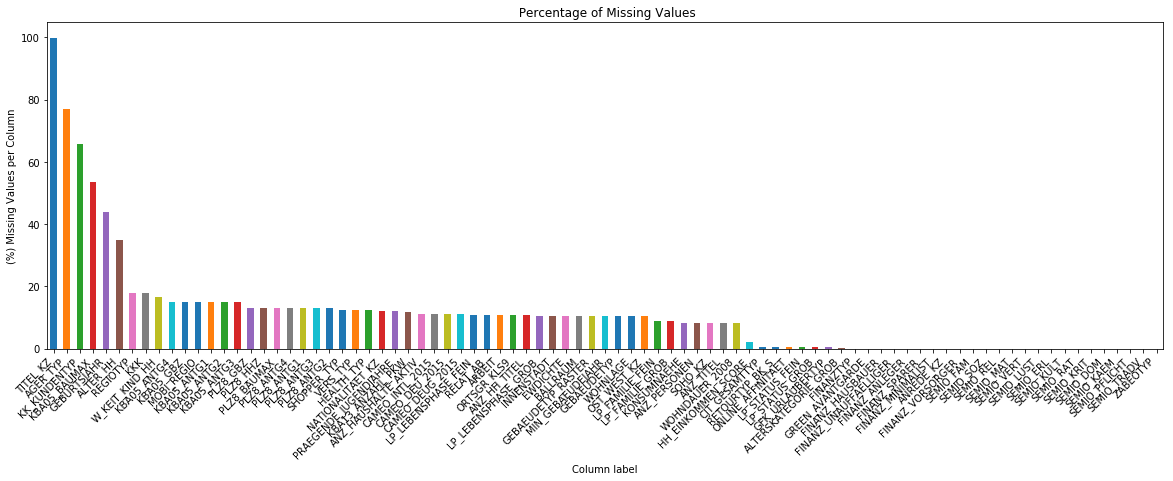

In [18]:
# Sorting bases on the amount of missing values in columns
missing_percentages = missing_percentages.sort_values(ascending=False)


# Using the bar chart to Pot the "missing_value_percentage" to the chart to see the different of each column (Finds the outliers)
plt.figure(figsize=(20, 6))
missing_percentages.plot(kind='bar') 
plt.title(' Percentage of Missing Values')
plt.xlabel('Column label')
plt.ylabel('(%) Missing Values per Column')
plt.xticks(rotation=45, ha='right')  

plt.show()

In [6]:
# From the chart observation, set the threshold at 30%, considering columns over that threshold will be ourliers, the drop it.
df_general.drop(columns=['TITEL_KZ','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH','AGER_TYP'], inplace=True)

In [20]:
# Check the updated number of columns after dropping the outliers. 
df_general.shape[1]

79

#### Discussion 1.1.2: Assess Missing Data in Each Column

* There is total of **85 columns** in the **demo_data**, which can brief into nine different topic columns regarding the **"Data_Dictionary.md"** file:
 1. Person-level features (First: 43 coulmns)
 2. Household-level features (next: 7 columns)
 3. Building-level features (7 columns)
 4. RR4 micro-cell features (3 columns)
 5. RR3 micro-cell features (6 columns)
 6. Postcode-level features (3 columns)
 7. RR1 neighborhood features (5 columns)
 8. PLZ8 macro-cell features (8 columns)
 9. Community-level features (3 columns)
 
 ---
 
* From the **missing_percentages** chart showing that their are **5 features** have more than **30%** of missing values. These columns should be considered outliers on the dataset because applying the fill-in technique to those missing places might lead to bias in the final prediction. 
 * **TITEL_KZ** (99.7% of missing values): Academic title flag.
 * **AGER_TYP** (76.9% of missing values): Best-ager typology.
 * **KK_KUNDENTYP** (65.6% of missing values): Consumer pattern over past 12 months.
 * **KBA05_BAUMAX** (53.5% of missing values): Most common building type within the microcell.
 * **GEBURTSJAHR** (44% of missing values): Year of birth.
 * **ALTER_HH** (35% of missing values): Birthdate of head of household.
 
 
* **Conclusion**: The information from the **Data_Dictionary.md** describing the general information for each feature above does not significantly impact the purpose of identifying the segments for the mail-order campaign. I decided to drop those features. 
 
 

# Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [21]:
# Assigns "missing_rows" variable for missing values in each row, then check to see the amount of missing values
# in each row
missing_rows = df_general.isnull().sum(axis=1)
missing_rows.head(20)

0     43
1      0
2      0
3      7
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11    47
12     6
13     8
14    47
15     8
16     6
17    47
18     3
19     0
dtype: int64

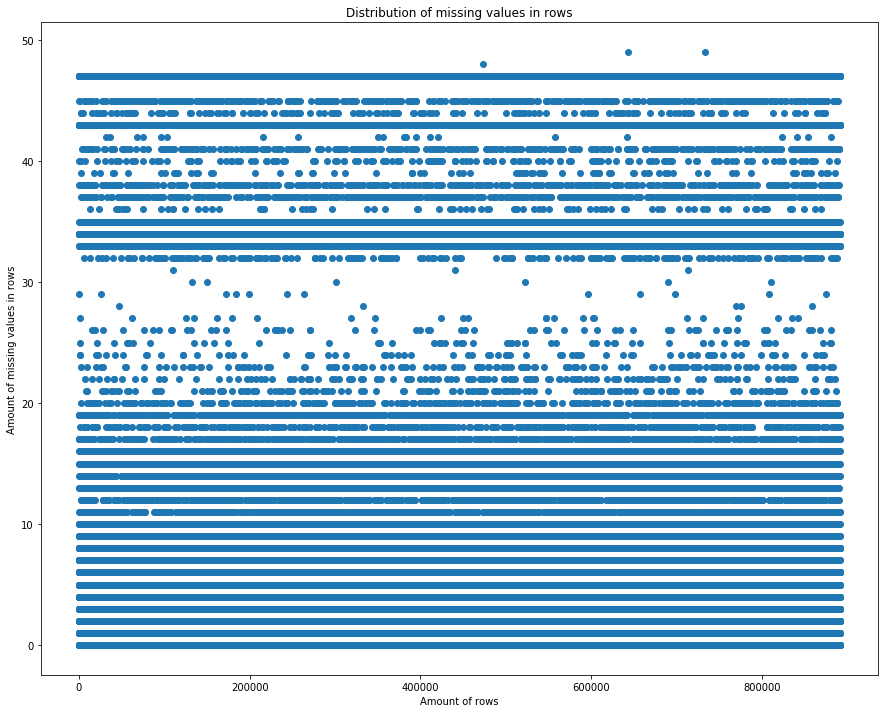

In [22]:
# Scatter the missing_rows to see their distribution 

plt.figure(figsize=(15,12))
plt.scatter(missing_rows.index, missing_rows.values)

plt.xlabel('Amount of rows')
plt.title('Distribution of missing values in rows')
plt.ylabel('Amount of missing values in rows')
plt.show()

In [7]:
# The observation from the "Distribution of missing values in rows" above:
# 1. The chart showing the information for more than 800,000 rows which each blue dot is represented a row. 
# 2. There is no gap in the portion of rows with less than 10% of missing values. 
# 3. There are some small gaps in the portion between 10% - 20%.
# 4. There are unpredictable amount of gaps in the portion of >20%

## The 10% should be used as the threshold to seperate the dataset as two subsets for further observation:
missing_threshold = df_general.shape[1] * 0.1

## subset 1: Contains non or very little amounts of missing values in each rows.
## subset 2: contains more >= 10% of missing values in each rows.

In [8]:
# The subset 1st: "missing_rows_low" (<10%) 
missing_rows_low = df_general[df_general.isnull().sum(axis=1) < missing_threshold]

# The subset 2nd: "missing_rows_high" (>=10%)
missing_rows_high = df_general[df_general.isnull().sum(axis=1) >= missing_threshold]


In [25]:
# The proportion of the subset 1st
(missing_rows_low.shape[0]/df_general.shape[0])*100

83.82982447675717

In [26]:
# The proportion of the subset 2nd
(missing_rows_high.shape[0]/df_general.shape[0])*100

16.170175523242833

In [9]:

# The function to compare the distribution different from the two subsets with countplot() and subplot()
# Which will be apply in the columns(features) which has 0 or fews missing values to see the different between the two subsets.

def compare_distributions(column):
    """
    Compares the distribution of values in a column between two subsets.
    Argrment: column: The name of the column to compare.
    """

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=column, data=missing_rows_high, ax=axes[0])
    axes[0].set_title('High Missing Subset')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Number of rows')

    sns.countplot(x=column, data=missing_rows_low, ax=axes[1])
    axes[1].set_title('Low Missing Subset')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Number of rows')

    plt.tight_layout()
    plt.show()


In [29]:
#  Using the five columns with no (or very low) missing values using to observe the distribution significant from the group of high 
# missing values and low missing values to eliminate the missing rows (outliers which less impact to the prediction)

#1. ALTERSKATEGORIE_GROB: Estimated age based on given name analysis (0% missing values)
#2. ANREDE_KZ: Gender (0% missing values)
#3. GREEN_AVANTGARDE: Membership in environmental sustainability as part of youth (0% of missing values)
#4. LP_FAMILIE_GROB: Family type, rough scale (~8% of missing value)
#5. LP_STATUS_GROB: Social status, rough scale (~0.5% of missing value)

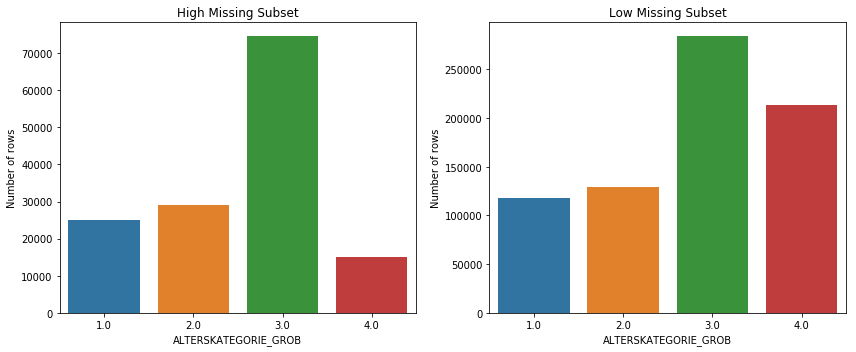

In [28]:
#1. ALTERSKATEGORIE_GROB: Estimated age based on given name analysis (> 40 missing values)
'''
Estimated age based on given name analysis
- -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: < 30 years old
-  2: 30 - 45 years old
-  3: 46 - 60 years old
-  4: > 60 years old
-  9: uniformly distributed'''

compare_distributions('ALTERSKATEGORIE_GROB')


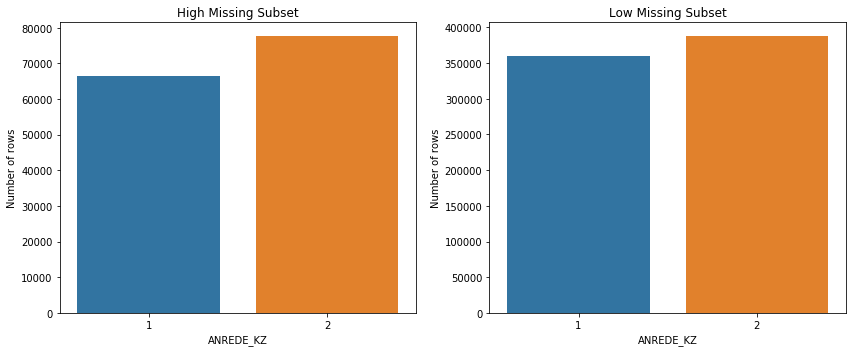

In [29]:
#2. ANREDE_KZ: Gender (> 40 missing value)
'''
 -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: male
-  2: female
'''
compare_distributions('ANREDE_KZ')

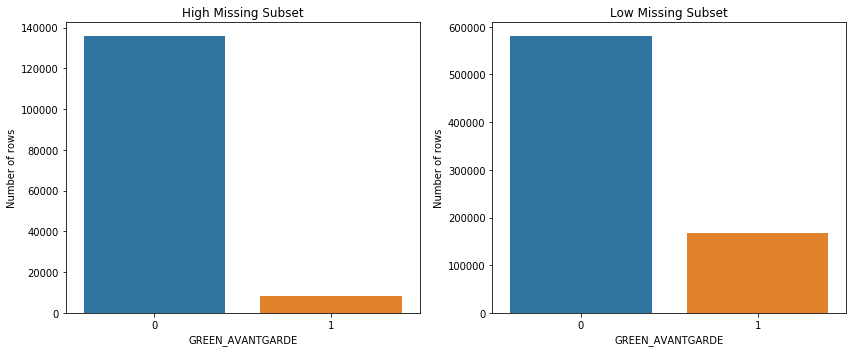

In [30]:
#3. GREEN_AVANTGARDE
'''
Membership in environmental sustainability as part of youth
- 0: not a member of green avantgarde
- 1: member of green avantgarde

'''
compare_distributions('GREEN_AVANTGARDE')

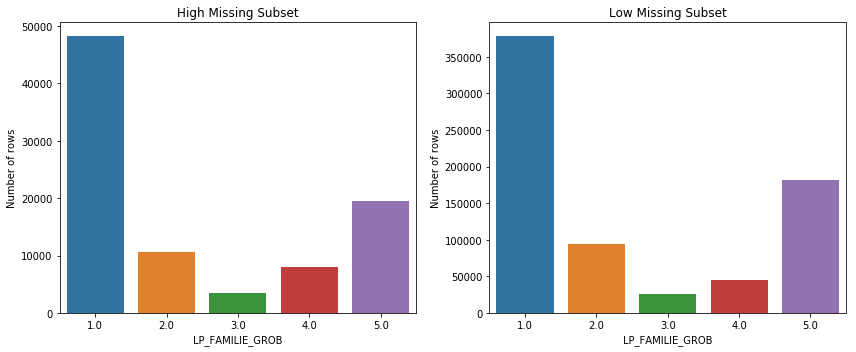

In [31]:
#4. LP_FAMILIE_GROB:
'''
Family type, rough scale
- 0: unknown
- 1: single (maps to 1 in fine scale)
- 2: couple (maps to 2 in fine scale)
- 3: single parent (maps to 3-5 in fine scale)
- 4: family (maps to 6-8 in fine scale)
- 5: multiperson household (maps to 9-11 in fine scale)
'''
compare_distributions('LP_FAMILIE_GROB')

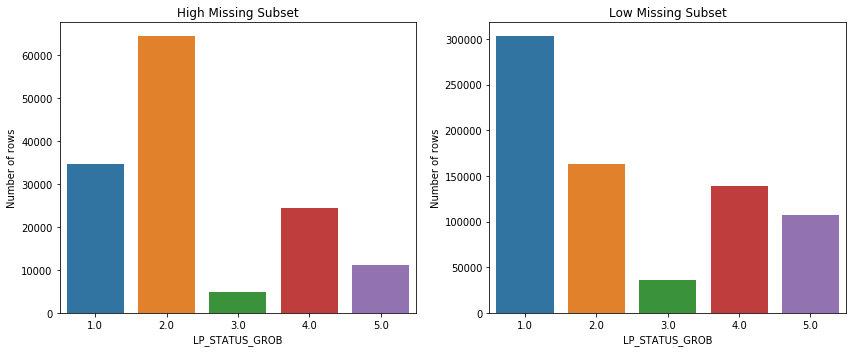

In [32]:
#5. LP_STATUS_GROB
'''
Social status, rough scale
- 1: low-income earners (maps to 1-2 in fine scale)
- 2: average earners (maps to 3-5 in fine scale)
- 3: independents (maps to 6-7 in fine scale)
- 4: houseowners (maps to 8-9 in fine scale)
- 5: top earners (maps to 10 in fine scale) '''
compare_distributions('LP_STATUS_GROB')

#### Discussion 1.1.3: Assess Missing Data in Each Row


* The dataset has many rows containing many missing values. For the comparison, I separated the dataset into two subsets based on the threshold of 10% of missing values in each row.
 * **missing_rows_low** subset: has **~84%** of the data in the **df_general** dataset which each row contains less than **10%** of missing values. 
 * **missing_rows_high** subset: has **~16%** of the data in the **df_general** dataset which each row contains more than **10%** of missing values. 
 ---
 
* The result from comparing five features with no (or very low) missing values to observe the distribution between the **missing_rows_low** subset and **missing_rows_high** subset:
 * **1. ALTERSKATEGORIE_GROB**: Estimated age based on given name analysis (0% missing values feature).
   * The distribution of the two subsets is pretty similar from categories 1-3 but there is the only different in the category 4, which the amount of people who is older than 60 years old in the **missing_rows_low** higher than the amount in the **missing_rows_high** subset. 
 * **2. ANREDE_KZ**: Gender (0% missing values feature)
   * The distribution of the two subsets is similar in the gender feature. 
 * **3. GREEN_AVANTGARDE**: Membership in environmental sustainability as part of youth (0% missing values feature)
   * The distribution of the two subsets is similar in this feature. 
 * **4. LP_FAMILIE_GROB**: Family type, rough scale (~8% of missing values feature)
   * The distribution of the two subsets is identical from the five categories with the highest is category 1 and the lowest is category 3. 
 * **5. LP_STATUS_GROB**: Social status, rough scale (0.5% of missing values feature
   * The lowest distribution is the same in the two subsets which is in the category 3 (independent) and the highest distribution belong to the category 1 (low-income earners) in the **missing_rows_low** dataset and the category 2 (average earners) in the **missing_rows_high** dataset.  
 ---
 
**SUMMARY:**

* **1. The similar pattern**: The information in the five features above is considered meaningful to the study's outcomes, which can contribute to the insight from the comprehensive. In general, the distribution of the two subsets is not identically similar in all features, but they are pretty similar in pattern. 

* **2. Accuracy purpose**: The scatter plot of the missing_rows information indicates many rows containing more than 30 missing values in the dataset, which could make the learning result misleading if the insight is learned from it.

#### Conclusion: I highly recommend dropping the subset with many missing rows.  

 



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [10]:
# From now on using the subset with zero or fews missing values data: "missing_rows_low"
# Assign a new variable "subset_processing" subset representing for the "missing_rows_low" subset
subset_processing = missing_rows_low.copy()
subset_processing.shape

# The new subset only has 79 columns instead of 85 column and 747,109 rows instead of 891,221 rows in the original dataset. 

(747109, 79)

In [34]:
# Creates a variable "feat_info_copy" to hold updated amount of columns for further investigation. 
feat_info_copy = feat_info.copy()

# assigns variables "drop_columns" to hold the names of outlier columns
drop_columns = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']

# Updates the "feat_info_copy"
drop_index = []
for index, row in feat_info_copy.iterrows():
    column_name = row['attribute']
    if column_name in drop_columns:
        drop_index.append(index)

feat_info_copy = feat_info_copy.drop(drop_index)
feat_info_copy = feat_info_copy.reset_index(drop=True)

In [35]:
# Check the size of the the original "feat_info"
feat_info.shape

(85, 4)

In [36]:
# Check the size of the updated "feat_info"
feat_info_copy.shape

(79, 4)

In [37]:
# How many features are there of each data type?
# Ordinal type has 49 features (keep)
feat_info_copy[feat_info_copy['type']== 'ordinal'].count()[1]

49

In [38]:
# Numeric type has 6 features (keep)
feat_info_copy[feat_info_copy['type']== 'numeric'].count()[1]

6

In [39]:
feat_info_copy[feat_info_copy['type']== 'categorical'].count()[1]

18

In [40]:
feat_info_copy[feat_info_copy['type']== 'mixed'].count()[1]

6

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [41]:
# Investigates the columns with the categorical datatype.

feat_info_copy[feat_info_copy['type']== 'categorical']

,attribute,information_level,type,missing_or_unknown
1,ANREDE_KZ,person,categorical,"[-1, 0]"
2,CJT_GESAMTTYP,person,categorical,[0]
9,FINANZTYP,person,categorical,[-1]
10,GFK_URLAUBERTYP,person,categorical,[]
11,GREEN_AVANTGARDE,person,categorical,[]
15,LP_FAMILIE_FEIN,person,categorical,[0]
16,LP_FAMILIE_GROB,person,categorical,[0]
17,LP_STATUS_FEIN,person,categorical,[0]
18,LP_STATUS_GROB,person,categorical,[0]
19,NATIONALITAET_KZ,person,categorical,"[-1, 0]"


In [55]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

## BINARY CATEGORICAL:
# 1. ANREDE_KZ: Genders ----------------------------------------------------------------------------------- KEEP (0% missing)

# 2. GREEN_AVANTGARDE: Membership in environmental sustainability as part of youth ------------------------KEEP (0% missing)

# 3. SOHO_KZ: Small office / home office flag -------------------------------------------------------------(DROP) (8% missing)
# 4. VERS_TYP: Insurance typology  ----------------------------------------------------------------------- (DROP) (12% missing values)
# 5. OST_WEST_KZ: Building location via former East / West Germany (GDR / FRG)--------------- (DROP)(~10% missing and Need to convert to numeric)


## MULTI-LEVEL CATEGORICAL: 
# 1. CJT_GESAMTTYP: Customer-Journey-Typology: preferred information and buying channels for consumer   --- KEEP (0.5% missing)
                                                                                  
# 2. FINANZTYP: Most descriptive financial type for individual     ----------------------------------------- KEEP (0% missing)

# 3. GFK_URLAUBERTYP: Vacation habits ---------------------------------------------------------------------- KEEP (0.5% missing)

# 4. LP_FAMILIE_FEIN: Family type, fine scale -------------------------------------------------------------- KEEP (~8% missing)

# 5. LP_FAMILIE_GROB: Family type, rough scale --------------------------- INCLUDED IN THE 'LP_FAMILIE_FEIN' (DROP)(~8% missing)

# 6. LP_STATUS_FEIN: Social status, fine scale ------------------------------------------------------------- KEEP (0.5% missing)

# 7. LP_STATUS_GROB: Social status, rough scale -------------------------- INCLUDED IN THE 'LP_STATUS_FEIN' (DROP)(0.5% missing)

# 8. NATIONALITAET_KZ: Nationality based on given name analysis -------------------------------------------- (DROP)(12% missing)

# 9. SHOPPER_TYP: Shopper typology ------------------------------------------------------------------------- KEEP (12% missing)

# 10. ZABEOTYP: Energy consumption typology ---------------------------------------------------------------- KEEP (0% missing)

# 11. GEBAEUDETYP: Type of building (residential vs. commercial) ------------------------------------------- (DROP)(10% missing)

# 12. CAMEO_DEUG_2015: German CAMEO: Wealth / Life Stage Typology, rough scale ----------------------------- KEEP (11% missing)

# 13. CAMEO_DEU_2015: German CAMEO: Wealth / Life Stage Typology, detailed scale - TOO DETAIL-> BIAS ISSUE - (DROP)(11% missing)

In [11]:
# COLUMNS SHOULD BE DROPPED :

# SOHO_KZ (Small office / home office flag): the information provided not to much related to the purpose of the study, contains missing values.
# VERS_TYP (Insurance typology): the information provided not to much related to the purpose of the study, contains missing values.
# OST_WEST_KZ (Building location via former East / West Germany (GDR / FRG)): not much related and missing values. 

# LP_FAMILIE_GROB (Family type, rough scale) information are included in the 'LP_FAMILIE_GROB'
# LP_STATUS_GROB (Social status, rough scale) information are included in the 'LP_STATUS_GROB'
# NATIONALITAET_KZ (Nationality based on given name analysis) many missing values and not much related information.
# CAMEO_DEU_2015 (German CAMEO: Wealth / Life Stage Typology, detailed scale) : Information is included in the "CAMEO_DEUG_2015"

drop_columns = ['SOHO_KZ','VERS_TYP','OST_WEST_KZ','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ','CAMEO_DEU_2015']

for col in drop_columns:
    subset_processing.drop(columns=col, inplace=True)

In [43]:
# Check the updated subset after dropping process. It was 78 columns --> 72 columns
subset_processing.shape

(747109, 72)

In [12]:
# Assigns variable "dummies_columns" contains the multi-categorical datatype columns which will be engineer later. 
dummies_columns = ['CAMEO_DEUG_2015','ZABEOTYP','SHOPPER_TYP','LP_STATUS_FEIN','LP_FAMILIE_FEIN',
                'GFK_URLAUBERTYP','FINANZTYP', 'CJT_GESAMTTYP']

# Using get_dummies() function to engineer the multi-categorical columns.
subset_processing = pd.get_dummies(subset_processing, columns=dummies_columns, prefix=dummies_columns, drop_first=False)


In [45]:
# Print out the updated size of the dataset after got engineering.
subset_processing.shape

(747109, 128)

In [46]:
# Print out the first couple rows for observation
subset_processing.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,NaN,NaN,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,7.0,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,32.0,10.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,1.0,2,3,1,5,2,2,5,0,3.0,8.0,2.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,1.0,0.0,5.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Discussion 1.2.1: Re-Encode Categorical Features


#### From observation the new subset of data which is subset_processing:
* There are 79 columns in the dataset:

 * **Categorical** data type:-------- 18 columns.
   * Binary categorical : -------- (5 columns).
   * Multi-level categorical: ---- (13 columns). 
  
 * **Mixed** data type: ------------- 6 columns.
 
 * **Numeric** data type: ----------- 6 columns.
 
 * **Ordinal** data type: ----------- 49 columns.
 ----
Understanding the 18 columns with **categorical** data type:
**The 5 columns as binary categorical data type:**
* **ANREDE_KZ**: genders / 0% of missing value **(KEEP)**
   * 1: male
   * 2: female

* **GREEN_AVANTGARDE**: Membership in environmental sustainability as part of youth / 0% missing value **(KEEP)
   * 0: not a member of green avantgarde
   * 1: member of green avantgarde

* **SOHO_KZ**: Small office-home office flag / 8% missing  (DROP) 
   * NaN: missing or known values
   * 0: external supplied hedonists
   * 1: Shopping-stressed
   * 2: family-shopper
   * 3: demanding shopper
   
* **VERS_TYP**: Insurance typology / 12% missing values (DROP) 
   * NaN: missing or unknown values
   * 1: social-safety driven
   * 2: individualistic-accepting risks
 
* **OST_WEST_KZ**: Building location via former East - West Germany (GDR / FRG) / 10% missing
   * NaN: missing or unknown values
   * O: East (GDR)
   * W: West (FRG)
   
**The 13 columns as multi-level categorical data type:**
* **CJT_GESAMTTYP**: Customer-Journey-Typology: preferred information and buying channels for consumer / 0.5% of missing values **(KEEP)** (0.5% missing)

* **FINANZTYP**: Most descriptive financial type for individual / 0% missing **(KEEP)**

* **GFK_URLAUBERTYP**: Vacation habits / 0.5% missing **(KEEP)**

* **LP_FAMILIE_FEIN**: Family type, fine scale / ~8% missing **(KEEP)**

* **LP_FAMILIE_GROB**: Family type, rough scale / ~8% missing **(DROP)**
   * Dropping reason: becuase the similar information is included in the 'LP_FAMILIE_FEIN'

* **LP_STATUS_FEIN**: Social status, fine scale / 0.5% missing **(KEEP)** 

* **LP_STATUS_GROB**: Social status, rough scale / ~0.5% missing **(DROP)** -------------------------- INCLUDED IN THE 'LP_STATUS_FEIN' (DROP)
   * **Dropping reason**: becuase the similar information is included in the 'LP_STATUS_FEIN'

* **NATIONALITAET_KZ**: Nationality based on given name analysis / ~12% missing **(DROP)** 
   * * **Dropping reason**: The information not much related to the study and many missing values. 
* **SHOPPER_TYP**: Shopper typology / ~12% missing **(KEEP)

* **ZABEOTYP**: Energy consumption typology / 0% missing **(KEEP)**

* **GEBAEUDETYP**: Type of building (residential vs. commercial) / 10% missing **(DROP)**
    * **Dropping reason**: The information not much related to the study and many missing values. 
* **CAMEO_DEUG_2015**: German CAMEO: Wealth / Life Stage Typology, rough scale / 11% missing **(KEEP)**

* **CAMEO_DEU_2015**: German CAMEO: Wealth / Life Stage Typology, detailed scale / ~11% missing **(DROP)** - TOO DETAIL-> BIAS ISSUE - (DROP)(11% missing)
    * **Dropping reason**: The information not much related to the study, many missing values, and many categories which could leads to bias in the prediction (overfit issue). 
---
#### There are  two steps to handle the multi-level categorical data type columns:

* **Step 1**: Applying the .drop(columns=) fucntion to drop the identified columns mentioned above.
* **Step 2**: Using the get_dummies() function to encode the rest of the columns. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [47]:
# Investigate the columns with data type as a 'mixed'
feat_info_copy[feat_info_copy['type'] == 'mixed'];

# LP_LEBENSPHASE_FEIN:  describes the Life stage, fine scale of individuals. (DROP)
'''
DROP REASON: There are 40 different detailed categories in this feature which might cause of 
overfit issue later. Using the 'LP_LEBENSPHASE_GROP' instead.
'''
# LP_LEBENSPHASE_GROB:  describes the Life stage, rough scale of individuals (KEEP)
'''
-  1: single low-income and average earners of younger age
-  2: single low-income and average earners of higher age
-  3: single high-income earners
-  4: single low-income and average-earner couples
-  5: single high-income earner couples
-  6: single parents
-  7: single low-income and average earner families
-  8: high-income earner families
-  9: average earners of younger age from multiperson households
- 10: low-income and average earners of higher age from multiperson households
- 11: high-income earners of younger age from multiperson households
- 12: high-income earners of higher age from multiperson households
'''
# *PRAEGENDE_JUGENDJAHRE: Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
'''
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)'''

# WOHNLAGE: Neighborhood quality (or rural flag) (KEEP)
'''
-  0: no score calculated
-  1: very good neighborhood
-  2: good neighborhood
-  3: average neighborhood
-  4: poor neighborhood
-  5: very poor neighborhood
-  7: rural neighborhood
-  8: new building in rural neighborhood'''

# *CAMEO_INTL_2015: German CAMEO: Wealth / Life Stage Typology, mapped to international code.
'''
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement'''
# PLZ8_BAUMAX: Most common building type within the PLZ8 region (DROP)
'''
-  1: mainly 1-2 family homes
-  2: mainly 3-5 family homes
-  3: mainly 6-10 family homes
-  4: mainly 10+ family homes
-  5: mainly business buildings'''


'\n-  1: mainly 1-2 family homes\n-  2: mainly 3-5 family homes\n-  3: mainly 6-10 family homes\n-  4: mainly 10+ family homes\n-  5: mainly business buildings'

In [13]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer it to two seperated new variables.
'''
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)'''

# Step 1: Creates variable 'decade_maps' to hold the interval data type corresponding with the "PRAEGENDE_JUGENDJAHRE" column:
decade_maps = {
    1: 1940, 2: 1940, 3: 1950, 4: 1950,
    5: 1960, 6: 1960, 7: 1960, 8: 1970,
    9: 1970, 10: 1980, 11: 1980, 12: 1980,
    13: 1980, 14: 1990, 15: 1990
}

# Step 2: Creates variable 'movement_maps' to hold the binary data type corresponding with the "PRAEGENDE_JUGENDJAHRE" column:

movement_maps = {
    1: 0,  2: 1,  3: 0,  4: 1,
    5: 0,  6: 1,  7: 1,  8: 0,
    9: 1, 10: 0, 11: 1, 12: 0,
   13: 1, 14: 0, 15: 1
}

# Step 3: Creates 2 news columns for the dataset to hold the values from map the "PRAEGENDE_JUGENDJAHRE"
# with the two new dictionary maps ('decade_maps' and 'movement_maps')

subset_processing['PRAEGENDE_DECADE'] = subset_processing['PRAEGENDE_JUGENDJAHRE'].map(decade_maps)
subset_processing['PRAEGENDE_MOVEMENT'] = subset_processing['PRAEGENDE_JUGENDJAHRE'].map(movement_maps)

# Step 4: Drops column 'PRAEGENDE_JUGENDJAHRE'
subset_processing.drop(columns='PRAEGENDE_JUGENDJAHRE',axis=1, inplace=True)

In [49]:
# Check the result from the engineering process.
subset_processing[['PRAEGENDE_DECADE','PRAEGENDE_MOVEMENT']].count()

PRAEGENDE_DECADE      730988
PRAEGENDE_MOVEMENT    730988
dtype: int64

In [50]:
# Double check to see whether 'PRAEGENDE_JUGENDJAHRE' column is still in the dataset.
#subset_processing['PRAEGENDE_JUGENDJAHRE'].count()

In [14]:
# Investigate "CAMEO_INTL_2015" and engineer it to two new variables.
'''
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
Engineering describe: wealth and life stage. Break up the two-digit codes by their 'tens' place
and 'ones'-place digits into two new ordinal variables (which, for the purposes of this 
project, is equivalent to just treating them as their raw numeric values).
'''

# Step 1: Convert all the values in the 'CAMEO_INTL_2015' column to numeric datatype 
## including the exeption of 'Nan' values in the column:
subset_processing['CAMEO_INTL_2015'] = pd.to_numeric(subset_processing['CAMEO_INTL_2015'], errors='coerce')

# Step 2: Assigns the 'WEALTH_LEVEL' column to hold the 'tens' digit of the 'CAMEO_INTL_2015'
subset_processing['WEALTH_LEVEL'] = subset_processing['CAMEO_INTL_2015'] // 10

# Step 3: Assigns the 'LIFE_STAGE' column to hold the 'ones' digit of the 'CAMEO_INTL_2015'
subset_processing['LIFE_STAGE'] = subset_processing['CAMEO_INTL_2015'] % 10

# Step 4: Drops the 'CAMEO_INTL_2015' column
subset_processing.drop(columns='CAMEO_INTL_2015',axis=1, inplace=True)

In [52]:
# Check the new created columns result:
subset_processing[['LIFE_STAGE','WEALTH_LEVEL']].count()

LIFE_STAGE      743878
WEALTH_LEVEL    743878
dtype: int64

In [53]:
# Check the result of dropping. 
#subset_processing['CAMEO_INTL_2015'].count()

In [15]:
# DROP THE COLUMNS: LP_LEBENSPHASE_FEIN, WOHNLAGE, and PLZ8_BAUMAX
subset_processing.drop(columns=['LP_LEBENSPHASE_FEIN','WOHNLAGE','PLZ8_BAUMAX'],axis=1, inplace=True)

## Discussion 1.2.2: Engineer Mixed-Type Features


#### From observation the subset_processing:
**There are 6 columns have the data type as a mixed:**

 * **LP_LEBENSPHASE_FEIN**: the Life stage, fine scale / ~11% missing values (DROP)
   * Drop reason: This includes 40 detailed categories in this feature which might cause of overfit issue later. Using the 'LP_LEBENSPHASE_GROP' instead.
 
 * **LP_LEBENSPHASE_GROB**: the Life stage, rough scale of individuals /~11% missing values (KEEP)
 
 * **PRAEGENDE_JUGENDJAHRE**: Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west) /~12% mmissing values (KEEP)
 
 * **WOHNLAGE**: Neighborhood quality (or rural flag) /~10% missing values (DROP)
   * Drop reason: The information in this feature not useful for the purpose of this study.
   
 * **CAMEO_INTL_2015**: Wealth / Life Stage Typology, mapped to international code- 11% missing values (KEEP)
 
 * **PLZ8_BAUMAX**: Most common building type within the PLZ8 region /~13% missing values (DROP)
    * Drop reason: The information in this feature not useful for the purpose of this study.
    
---
#### Conclusion:
* **Keep columns**: LP_LEBENSPHASE_GROB, PRAEGENDE_JUGENDJAHRE, and CAMEO_INTL_2015.
* **Drop columns**: LP_LEBENSPHASE_FEIN, WOHNLAGE, and PLZ8_BAUMAX

---
#### Applying different engineering techniques to each of the keep column:
* **PRAEGENDE_JUGENDJAHRE** column: 
    * Step 1: Creates a list of dictionary to map the decade values as an interval data.
    * Step 2: Creates a list of dictionary to map the movement values as a binary data.
    * Step 3: Assigns 2 new columns to hold the mapping values of from the 'PRAEGENDE_JUGENDJAHRE' with the created dictionary maps above.
    * Step 4: Drops the 'PRAEGENDE_JUGENDJAHRE' column.
    
* **CAMEO_INTL_2015** column:
    * Step 1: Convert the all values in the 'CAMEO_INTL_2015' to numeric data type with the NaN exeption.
    * Step 2: Creates new column 'WEALTH_LEVEL' to hold the 'tens' digit of the values in the 'CAMEO_INTL_2015' column.
    * Step 3: Creates new column 'LIFE_STAGE' to hold the 'one' digit of the values in the 'CAMEO_INTL_2015' column.
    * Step 4: Drop the 'CAMEO_INTL_2015' column
    

# Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [16]:
# Create the variable 'data_processed' as a copy of the 'subset_processing' 
# The subset contain non - or less than 10% of missing values in each row. 
data_processed = subset_processing.copy()

In [56]:
# Obsevation the datatype of each column in the dataset. 
# Datatype: numeric, interval, ordinal, and binary. 
print(data_processed.dtypes)

ALTERSKATEGORIE_GROB     float64
ANREDE_KZ                  int64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
GREEN_AVANTGARDE           int64
HEALTH_TYP               float64
LP_LEBENSPHASE_GROB      float64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL                  int64
SEMIO_KULT                 int64
SEMIO_RAT                  int64
SEMIO_KRIT                 int64
SEMIO_DOM                  int64
SEMIO_KAEM                 int64
SEMIO_PFLICHT              int64
SEMIO_TRADV                int64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
HH_EINKOMMEN_SCORE       float64
W_KEIT_KIND_HH           float64
WOHNDAUER_

In [66]:
data_processed.shape

(747109, 127)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [17]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: data set need to be cleaned
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...

    for index, row in feat_info.iterrows():
        feature = row['attribute']
        feature_missing = row['missing_or_unknown']
        if feature in df.columns:
            df[feature] = df[feature].replace(feature_missing, np.nan)
        
    # remove selected columns and rows, ...
    ## Removes the outliers columns which have more than 30% mising values in each column.
    drop_columns = ['TITEL_KZ','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH','AGER_TYP']
    df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)

    #for col in drop_columns:
        #if col in df.columns:
            #df.drop(columns = col, inplace= True)
    
    ## The threshold at 10% to seperate the dataset to two different subsets.
    threshold = df.shape[1] * 0.1
    missing_counts = df.isnull().sum(axis=1)
    
    subset_low = df[missing_counts < threshold]   #holds rows with less than 10% of missing values
    subset_high = df[missing_counts >= threshold] #holds rows with >= 10% of missing values
    
    ## Assigns the 'df_new' to hold the data in the subset has missing values in rows less than 10%
    df_new = subset_low.copy()

    # select, re-encode, and engineer column values.
    ## drops these columns after do the investigating for the data with categorical and mixed type
    drop_columns1 = ['SOHO_KZ','VERS_TYP','OST_WEST_KZ','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ',
                     'CAMEO_DEU_2015', 'LP_LEBENSPHASE_FEIN','WOHNLAGE','PLZ8_BAUMAX']
    df_new.drop(columns=[col for col in drop_columns1 if col in df_new.columns], inplace=True)

    #for col in drop_columns1:
        ##if col in df_new.columns:
            #df_new.drop(columns=col, inplace=True)
    
    ## Categorical columns will need to engineer
    engineer_columns = ['CAMEO_DEUG_2015','ZABEOTYP','SHOPPER_TYP','LP_STATUS_FEIN','LP_FAMILIE_FEIN','GFK_URLAUBERTYP',
                        'FINANZTYP','CJT_GESAMTTYP']
    df_new = pd.get_dummies(df_new, columns=engineer_columns,prefix=engineer_columns, drop_first=False)
    
    ## engineer the mixed type column "PRAEGENDE_JUGENDTAHRE"
    df_new['PRAEGENDE_DECADE'] = df_new['PRAEGENDE_JUGENDJAHRE'].map(decade_maps)
    df_new['PRAEGENDE_MOVEMENT'] = df_new['PRAEGENDE_JUGENDJAHRE'].map(movement_maps)
    ## engineer the mixed type column "CAMEO_INTL_2015"
    df_new['CAMEO_INTL_2015'] = pd.to_numeric(df_new['CAMEO_INTL_2015'], errors='coerce')
    df_new['WEALTH_LEVEL'] = df_new['CAMEO_INTL_2015'] // 10
    df_new['LIFE_STAGE'] = df_new['CAMEO_INTL_2015'] % 10
    
    ## After engineer the mixed type drop the original columns
    #df_new.drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDTAHRE'], axis=1, inplace=True)
    df_new.drop(columns=[col for col in ['CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE'] if col in df_new.columns], inplace=True)
    
    
    # Return the cleaned dataframe.
    return df_new
    
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [18]:
# Assigns "df_general" is the cleaned dataset (Non-NaN values) extracting from "data_processed"
df_general = data_processed.dropna().copy()

In [95]:
# Observation the amount of data in the "data_processed" containing missing values
data_processed.shape

(747109, 127)

In [96]:
# Observation the amount of data in the "df_general" containing non-missing value. 
df_general.shape

(623210, 127)

In [97]:
# Print out couple rows for observation
df_general.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,PRAEGENDE_DECADE,PRAEGENDE_MOVEMENT,WEALTH_LEVEL,LIFE_STAGE
1,1.0,2,1,5,2,5,4,5,0,3.0,6.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1990.0,0.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,1.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1990.0,1.0,2.0,4.0
4,3.0,1,4,3,4,1,3,2,0,3.0,10.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1970.0,0.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,2.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,1.0,0.0,5.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1950.0,0.0,5.0,4.0
6,2.0,2,1,5,1,5,4,3,0,2.0,1.0,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1.0,0.0,6.0,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,5.0,5.0,4.0,6.0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1980.0,0.0,2.0,2.0


In [19]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

# Initiate the scaler model
scaler = StandardScaler()

# Fit the model to the dataset 
df_scaled = scaler.fit_transform(df_general)

In [20]:
# Converts the transformed result back to pandas DataFrame.
df_scaled = pd.DataFrame(df_scaled, columns=df_general.columns)

In [21]:
# Print out few rows for investigate
df_scaled.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,PRAEGENDE_DECADE,PRAEGENDE_MOVEMENT,WEALTH_LEVEL,LIFE_STAGE
0,-1.746285,0.977823,-1.512225,1.581059,-1.045044,1.539060,1.047074,1.340483,-0.553670,1.044645,0.279538,-1.665692,0.388389,-0.041040,0.053094,-0.421291,-1.704578,-1.090398,-1.407642,-0.593939,1.265681,-0.288621,1.285083,-0.134393,1.491934,1.256808,0.170632,-0.060732,0.978312,-0.688382,0.548078,0.166228,-0.129568,1.905901,-1.283854,-0.344822,-1.065423,-1.024111,-0.620111,2.680142,-1.631653,0.867557,-0.601197,1.728771,-0.797504,-0.744667,-1.384494,0.164129,-0.804371,1.056289,-0.234264,0.182486,0.374154,0.384671,1.441601,0.583437,-0.201179,-0.171844,0.656462,-0.221388,-0.324714,-0.3369,-0.383816,-0.265613,-0.403042,-0.331589,2.114435,-0.403596,-0.420363,-0.181169,-0.746891,-0.609066,2.966190,-0.309314,-0.467036,-0.666988,-0.630007,1.835389,-0.626254,2.586973,-0.321354,-0.320363,-0.171816,-0.19709,-0.110747,-0.132434,-0.430265,-0.420056,-1.044305,-0.385962,-0.076075,-0.122231,8.204387,-0.100332,-0.152019,-0.166262,-0.119891,-0.458590,-0.266228,-0.261641,-0.21457,-0.276403,-0.3005,-0.318282,-0.18541,-0.230435,-0.354011,-0.266311,2.575875,-0.326886,-0.432162,1.806026,-0.381841,-0.202857,-0.277736,-0.405808,-0.792167,-0.364155,-0.471133,-0.485822,-0.589965,2.608518,-0.376221,1.164454,-0.553670,1.147883,-1.251109
1,0.202110,0.977823,-1.512225,0.900445,-1.765053,-0.531626,0.318373,1.340483,1.806131,1.044645,-1.042922,-0.290656,-0.123870,-1.602196,-0.480082,-0.421291,-0.143567,-0.150228,0.781261,-0.593939,0.084593,1.414521,1.285083,1.427579,-0.588813,-0.408540,-0.719120,-0.060732,-0.351534,-0.688382,0.548078,0.101260,-0.129568,-0.687012,1.331137,-0.344822,-0.358096,1.380706,0.359115,-0.473109,-0.113435,-0.952493,-0.013343,-0.239106,0.298398,-0.744667,0.023885,-0.480530,-1.350574,0.301159,0.788321,0.182486,-0.641994,-0.981972,0.400950,0.583437,-0.201179,-0.171844,-0.823844,-0.221388,-0.324714,-0.3369,2.605413,-0.265613,-0.403042,-0.331589,-0.472940,-0.403596,-0.420363,-0.181169,-0.746891,-0.609066,2.966190,-0.309314,-0.467036,-0.666988,1.587284,-0.544844,-0.626254,-0.386552,3.111829,-0.320363,-0.171816,-0.19709,-0.110747,-0.132434,-0.43

## Discussion 2.1: Apply Feature Scaling

#### Conclusion: Applying the StandarScaler(), the cleaned data containing no NaN values will scale each column feature to have a mean of 0 and a standard deviation of 1.


# Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [22]:
# Apply PCA to the data.

# Import the sklearn PCA
from sklearn.decomposition import PCA

# Initiate the Principle Component Analysis model.
pca = PCA(random_state=40) # not set any parameter

# Fit the model to the scaled dataset.
pca.fit(df_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=40,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
# Investigate the variance accounted for by each principal component.

# Check to see the result variance of each feature
pc_variances = pca.explained_variance_ratio_
pc_variances

array([  1.09035716e-01,   8.57998105e-02,   5.43374108e-02,
         3.60989948e-02,   2.69936561e-02,   1.88711534e-02,
         1.73049087e-02,   1.69103793e-02,   1.51775878e-02,
         1.44194592e-02,   1.31550425e-02,   1.27925767e-02,
         1.26145201e-02,   1.17862915e-02,   1.14308312e-02,
         1.09344866e-02,   1.07085649e-02,   1.03753932e-02,
         1.02848379e-02,   1.00931840e-02,   1.00463934e-02,
         9.77887397e-03,   9.61580360e-03,   9.53151841e-03,
         9.45240463e-03,   9.43482180e-03,   9.20197730e-03,
         9.08685002e-03,   9.07525881e-03,   8.92192383e-03,
         8.82116752e-03,   8.78863189e-03,   8.77171080e-03,
         8.66956150e-03,   8.62116848e-03,   8.58463999e-03,
         8.48348950e-03,   8.34982816e-03,   8.33816771e-03,
         8.26196174e-03,   8.22445621e-03,   8.16820829e-03,
         8.09729590e-03,   8.02309831e-03,   8.00774023e-03,
         7.96760495e-03,   7.93277174e-03,   7.88621460e-03,
         7.86059060e-03,

In [24]:
# Observate the variance ratio as cumulative 
cumulative_variance = pc_variances.cumsum()
cumulative_variance

array([ 0.10903572,  0.19483553,  0.24917294,  0.28527193,  0.31226559,
        0.33113674,  0.34844165,  0.36535203,  0.38052962,  0.39494908,
        0.40810412,  0.4208967 ,  0.43351122,  0.44529751,  0.45672834,
        0.46766282,  0.47837139,  0.48874678,  0.49903162,  0.50912481,
        0.5191712 ,  0.52895007,  0.53856588,  0.54809739,  0.5575498 ,
        0.56698462,  0.5761866 ,  0.58527345,  0.59434871,  0.60327063,
        0.6120918 ,  0.62088043,  0.62965214,  0.6383217 ,  0.64694287,
        0.65552751,  0.664011  ,  0.67236083,  0.680699  ,  0.68896096,
        0.69718541,  0.70535362,  0.71345092,  0.72147402,  0.72948176,
        0.73744936,  0.74538213,  0.75326835,  0.76112894,  0.76884687,
        0.77650829,  0.78407051,  0.79155657,  0.79898937,  0.80630996,
        0.81353107,  0.82066573,  0.82776928,  0.83484669,  0.84173849,
        0.84856585,  0.85529621,  0.86182135,  0.86813836,  0.87397578,
        0.87975854,  0.88546937,  0.89099452,  0.89641204,  0.90

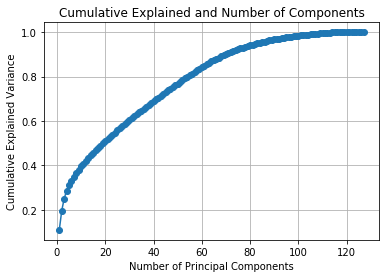

In [25]:
# Use the matplotlib to plot the resutl from the cumulation feature ratios.
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained and Number of Components")
plt.grid(True)
plt.show()

In [26]:
# Based on the chart above --> should retaining 90% variance should be good.
num_component_final = None
for i, cum in enumerate(cumulative_variance):
    if cum >= 0.90:
        num_component_final = i + 1
        break
        
print(num_component_final)

70


In [27]:
# Re-apply PCA to the data while selecting for number of components to retain.
# Will keep 70 components to able to retain 90% of the variance.

# Initiate the Principle Component Analysis model with n_components set by the result from of "num_component_final"
pca_final = PCA(n_components = num_component_final, random_state = 40)

# Fit the model back on the scaled dataset. 
df_pca = pca_final.fit_transform(df_scaled)


In [28]:
# Transform the "df_pca" with component vectors back to pd dataframe
df_pca = pd.DataFrame(df_pca)

In [29]:
# Print out few rows for investigate the result.
df_pca.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,5.067772,-2.771335,-3.021416,0.529032,0.267035,4.403099,0.641355,2.048462,0.024098,-0.275739,-1.852131,-0.898749,-0.728394,0.270410,0.254773,-1.062019,0.640217,0.251830,1.694093,-0.791393,-0.652840,-1.331087,-0.757192,2.281625,0.956741,1.412619,2.240563,0.369261,-0.463008,-0.238065,0.840115,-0.407692,0.608211,-1.058804,-0.176795,0.388141,-0.110942,0.700928,1.078966,1.976558,0.825122,-0.092676,2.081301,-0.441030,2.789492,-1.891601,5.102315,-0.763391,0.830545,-1.285742,1.872888,-1.106358,1.634471,-1.626482,-0.226880,-2.494708,-1.080546,2.211914,-0.773490,-0.367773,-0.437978,1.008597,-1.225772,0.559949,-0.626373,-0.911021,0.659756,0.978578,-1.130088,0.282354
1,0.034460,-0.596316,-3.254340,1.601190,-3.462860,0.517820,0.170974,-0.487800,-0.269494,0.932853,-0.173287,-0.922806,-0.293643,-3.436571,1.197319,0.880146,0.492979,-0.163751,-1.386046,0.760031,-1.394618,0.621871,-0.523174,0.340207,1.169305,0.756471,1.075012,1.035041,0.525631,1.625581,2.177067,-1.261229,1.088722,-0.511564,1.632434,-0.323663,-0.305912,0.117644,-1.054448,0.456472,0.608745,-0.045423,-1.041091,0.105138,-0.503454,-0.280741,1.300271,1.158574,0.078295,0.100146,-0.034251,0.852734,-0.012862,-0.374707,1.266327,0.994913,-0.675789,-0.999353,-0.147870,-0.224597,-0.526595,0.063185,-0.649189,-1.158409,-0.089083,-1.181733,-0.387532,-0.581504,-0.067117,1.393424
2,-0.056303,0.276752,3.187592,1.657476,3.272631,-0.178104,-0.325433,-4.039467,0.390504,1.529399,2.148046,-0.887009,0.191122,-1.997408,-0.120734,-0.248826,-0.696973,-0.051582,-0.406708,2.312100,1.301977,-0.285979,0.136344,0.388617,2.226215,1.447643,0.662050,0.676512,-1.032570,-2.107466,1.433079,1.120940,0.710145,-0.019623,0.086927,-0.727403,-1.048125,-1.352167,1.161301,0.583855,-0.903747,-0.310498,-0.731445,0.505823,-0.057861,0.064218,0.201477,0.712797,0.205670,0.103714,0.050236,0.274048,-0.638906,1.200117,-0.045576,0.103554,-0.462043,0.634004,-0.296529,-0.741236,0.075216,1.200710,-0.170306,-0.410068,0.198715,-1.167748,-0.994841,-1.264924,0.138510,0.294112
3,-0.479072,-1.209423,-1.118437,-3.735093,-1.968276,2.399376,-0.480092,-1.344729,0.702562,-3.387489,1.104415,-0.512141,0.422819,1.579794,0.742536,0.320886,-0.761426,-1.476717,1.123585,0.386655,-0.040842,0.298911,-2.007818,1.976016,-1.191392,-2.360216,-0.401664,-0.332184,0.238043,-0.688396,-1.080536,0.712185,0.213576,0.846527,-1.183074,0.483332,0.034515,-2.038326,0.158630,2.299628,1.008140,0.213432,-1.472267,-0.905290,0.752896,1.316757,-0.916766,-1.443900,-0.972754,0.237371,0.245212,0.296460,1.877209,-0.294000,0.173079,-1.085909,0.818833,0.663286,0.980556,-0.633404,-0.502466,0.179103,0.338546,0.362945,0.949792,-0.478938,-0.866849,-1.037267,-0.684142,0.987156
4,1.643519,-3.955134,-3.281329,-1.361482,-2.251973,-0.183623,-0.684215,-1.257837,-0.774967,-0.382709,0.800562,1.727297,0.195007,1.460181,-1.101436,1.143365,0.683022,-1.172654,-0.795127,0.899689,1.463684,-0.415718,1.188943,1.384825,1.053293,-0.138425,0.519097,0.978744,-0.955909,1.692988,-0.020511,-1.410700,-0.850299,-0.557104,0.638342,-2.417477,-1.020939,-1.018984,-0.179503,0.327466,0.079892,-0.770313,0.171448,0.473412,0.114305,0.426508,0.066139,-0.084315,0.761523,0.446513,-0.891450,1.041033,-0.979809,0.164559,-0.842671,-0.774348,1.380833,0.596507,-0.042660,-0.645302,-0.841001,0.675028,-0.563188,0.591840,-0.777454,0.263512,-1.853485,1.623918,1.566824,-0.269517


## Discussion 2.2: Perform Dimensionality Reduction

* Step 1: Applying the principle component analysis to entire scaled dataset.
* Step 2: Plotting the chart to observe the variance ratio of the principle components from the dataset. 

#### Conclusion: From observation, the elbow is in the variance at 0.9 (90%), which points to 70 components. It means that only using 70 components can explain 90% of the variance for the dataset instead of using 127 components to explain 100% of the dataset. 

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [30]:
def print_feature_weights(pca, component_index, n=3):  # Added top_n parameter
    """
    Function to map the weights of each feature to their names in the each principle component and the three highest
    and lowest weight of each feature in the component. 

    Arguments:      pca: Fitted PCA object.
                    component_index: The index of the component in the n list
                    n: Number of top weighted features to display (positive and negative).
    """
    # Pick-out which component to observe
    weights = pca.components_[component_index]
    feature_names = df_scaled.columns  

    # Maps the the weight of each feature to their feature name
    weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})

    # Sort by the weight of features from highet to lowest 
    #weights_df['Abs_Weight'] = np.abs(weights_df['Weight'])
    weights_df_sorted = weights_df.sort_values('Weight', ascending=False)

    print(f"Top {n} features for Principal Component {component_index + 1}:")
    print(weights_df_sorted[['Feature', 'Weight']].head(n))  # Top positive
    print(weights_df_sorted[['Feature', 'Weight']].tail(n))  # Top negative

    

In [31]:
# Map weights for the first principal component to corresponding feature names
print_feature_weights(pca_final,component_index=0)

Top 3 features for Principal Component 1:
                Feature    Weight
28   HH_EINKOMMEN_SCORE  0.183046
52           PLZ8_ANTG3  0.179629
125        WEALTH_LEVEL  0.178571
              Feature    Weight
36        KBA05_ANTG1 -0.192483
46         MOBI_REGIO -0.204381
2   FINANZ_MINIMALIST -0.211999


In [32]:
# Map weights for the second principal component to corresponding feature names
print_feature_weights(pca_final,component_index=1)

Top 3 features for Principal Component 2:
                 Feature    Weight
0   ALTERSKATEGORIE_GROB  0.214739
70            ZABEOTYP_3  0.197212
4       FINANZ_VORSORGER  0.194916
                   Feature    Weight
6    FINANZ_UNAUFFAELLIGER -0.199556
14               SEMIO_REL -0.207479
123       PRAEGENDE_DECADE -0.218076


In [33]:
# Map weights for the third principal component to corresponding feature names
print_feature_weights(pca_final,component_index=2)

Top 3 features for Principal Component 3:
       Feature    Weight
16  SEMIO_VERT  0.325798
13   SEMIO_FAM  0.260265
12   SEMIO_SOZ  0.258002
       Feature    Weight
22   SEMIO_DOM -0.289312
23  SEMIO_KAEM -0.320073
1    ANREDE_KZ -0.348240


## Discussion 2.3: Interpret Principal Components


#### 1. Observation from the first principle component vector:
* The three most significant impacts (positive) of this principle component are:
  * HH_EINKOMMEN_SCORE (~ +18%): Estimated household net income.
  * PLZ8_ANTG3: (~ +18%): Number of 6-10 family houses in the PLZ8 region.
  * WEALTH_LEVEL (~ +18%): The family wealthy level
  
   
* The three most significant impacts (negative) of this principle component are:
  * FINANZ_MINIMALIST: (~ -21%): Low financial interest in the Financial typology
  * MOBI_REGIO: (~ -20%): Movement patterns
  * KBA05_ANTG1: (~ 19%): Number of 1-2 family houses in the microcell
   
#### Conclusion: In the first component principle,  the family's finances, family location, and the number of houses in the area have a significant impact on this component principle. 
---
#### 2. Observation from the second principle component vector:
* The three most significant impacts (positive) of this principle component are:
  * ALTERSKATEGORIE_GROB (~ +21%): Estimated age based on given name analysis.
  * ZABEOTYP_3 (~ +19%): The fair supplied - Energy consumption typology.
  * FINANZ_VORSORGER (~ +19%): Be prepared - For the Financial typology.
* The three most significant impacts (negative) of this principle component are:
  * PRAEGENDE_DECADE (~ -22%): The living decades of individuals
  * SEMIO_REL (~ -21%): The religious of individuals
  * FINANZ_UNAUFFAELLIGER (~ -20%): The inconspicuous of individuals about their financial. 
   
#### Conclusion: In the second component principle, the information of individuals about their age group, the period they are growing up, and their religion has the most impact on the weight of this component principle. 
---
#### 3. Observation from the second principle component vector:
* The three most significant impacts (positive) of this principle component are:
  * SEMIO_VERT (~ +32%): Dreamful - Personality typology of individuals.
  * SEMIO_FAM (~ +26%): Family minded - Personality typology of individuals.
  * SEMIO_SOZ (~ +26%): Socially minded - Personality typology of individuals.
* The three most significant impacts (negative) of this principle component are:
  * ANREDE_KZ (~ -34%): Gender.
  * SEMIO_KAEM (~ -32%): Combative attitude - Personality typology of individuals.
  * SEMIO_DOM (~ -29%): Dominant minded - Personality typology of individuals.
   
#### Conclusion: In the third component principle, the information of individuals about their gender and their personality typology has the most impact on the weight of this component principle. 


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

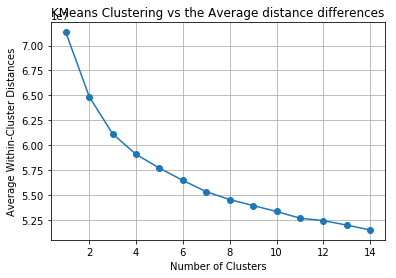

In [35]:
# Investigate the change in within-cluster distance across number of clusters.

# Imports the KMeans Cluster model from sklearn
from sklearn.cluster import KMeans


# Assigns variable "scores" to hold a list of score result from each KNmeans model with different number of cluster.
scores = []
cluster_counts = list(range(1, 15))  # Test cluster counts from 1 to 15

for n_clusters in cluster_counts:
    kmeans = KMeans(n_clusters=n_clusters, random_state=40)  # Set random_state for reproducibility
    kmeans.fit(df_pca)
    score = abs(kmeans.score(df_pca))  # KMeans score is negative, so take the absolute value
    scores.append(score)

# Plot the scores to find the "elbow" then assigns the good number of cluster for the KMeans model. 
plt.plot(cluster_counts, scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Within-Cluster Distances")
plt.title("KMeans Clustering vs the Average distance differences")
plt.grid(True)


In [34]:
from sklearn.cluster import KMeans # don't want to run the above line because it take very long to generate the result
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# The chart shows that the steep decline in Average of distance from 1 to 5 number of clusters. After that the different of the 
# distance don't significantly change much. Should choose 5 clusters to segment the dataset. 

# Initiates the "final_model" with n_clusters = 5
final_model = KMeans(n_clusters=5, random_state = 40)

#Fit the "final_model" to the "df_pca" dataset
final_model.fit(df_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=40, tol=0.0001, verbose=0)

In [35]:
# Using the final_model to predict the dataset
df_clusters = final_model.predict(df_pca)

In [36]:
# Investigate the distribution of data across clusters
general_cluster_counts = pd.Series(df_clusters).value_counts().sort_index()
print(general_cluster_counts)

0    124878
1    129651
2     95787
3    170258
4    102636
dtype: int64


## Discussion 3.1: Apply Clustering to General Population


Finding the best K-cluster number to segment the principle components dataset "df_pca" by investigating the elbow curve in the chart between the cluster sum of squared distance and each model with a different k_cluster.

The chart shows a steep decline from 1 to 5. The elbow point appears around 4-5 k_clusters. After that point, the point distance in each model still decreases, but at a slower rate. 

#### Conclusion: Choosing the number of cluster is 5 to build a KMeans model. 


# Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [37]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

# Cleans the "customers" dataset with the created "clean_data()" function:
cleaned_customers = clean_data(customers.copy())

# Check the current size of the dataset
cleaned_customers.shape

(133427, 127)

In [38]:
# Drops any row containing a "NaN" value
df_customers = cleaned_customers.dropna().copy()

# Print the side of the dataset to check the drop result.
df_customers.shape


(115643, 127)

In [39]:
# (Feature Scaling) Using the mean 0 and standard deviation 1 to tranform the values in the dataset 
df_scaled_customers = scaler.fit_transform(df_customers)

# Converts the transformed result back to pandas DataFrame.
df_scaled_customers = pd.DataFrame(df_scaled_customers, columns=cleaned_customers.columns)

# Print out few rows to observe
df_scaled_customers.head(5)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,PRAEGENDE_DECADE,PRAEGENDE_MOVEMENT,WEALTH_LEVEL,LIFE_STAGE
0,0.695345,-0.691442,0.712637,-0.49594,0.492276,-0.574838,0.220190,-0.596238,0.938625,-1.245832,-0.563552,0.912439,0.989979,0.689959,-0.798991,1.288020,0.467977,0.865827,-1.062023,0.041381,-1.332957,-0.490615,-1.892579,-1.392966,-0.644266,-1.339650,-0.299890,-0.138996,-1.376753,0.911490,0.27289,-0.283896,-0.132672,-0.564010,1.316455,-0.288355,-0.172110,0.721255,-0.400011,-0.312294,0.317048,-0.598538,-1.202115,-0.388726,0.179899,-1.412746,0.280187,0.012290,-1.523666,1.602613,0.507338,0.305988,-0.452084,-0.851404,1.479191,1.379133,-1.826652,-1.465423,-1.353193,2.647465,-0.438724,-0.379004,-0.43164,-0.296053,-0.398154,-0.284601,-0.325441,-0.211868,-0.794603,-0.209000,1.164710,-0.347219,-0.080415,-0.184025,-0.554672,-0.577034,-0.443298,1.360702,-0.383096,-0.084663,-0.339429,-0.182791,-0.069757,-0.22061,-0.284832,-0.052262,-0.507008,1.23565,-0.635433,1.947485,-0.030856,-0.057494,-0.07495,-0.067854,-0.126697,-0.173596,-0.1332,-0.600035,-0.439816,-0.250497,-0.160806,-0.340963,2.694260,-0.364828,-0.216155,-0.329149,-0.375954,-0.185502,-0.477491,-0.232177,-0.195328,-0.158528,1.557612,-0.140095,-0.112606,-0.726283,-0.664821,-0.441482,-0.647331,-0.448899,-0.470185,2.653769,-0.271149,-0.640226,0.938625,-1.140343,-0.296595
1,0.695345,1.446252,0.712637,-0.49594,0.492276,-0.574838,2.373089,0.952626,0.938625,0.059970,-1.053536,0.912439,-1.494095,-1.120299,-1.504554,-0.200944,-1.261463,0.865827,1.207390,-1.669115,-0.593291,1.759862,0.614887,1.362972,0.775753,-1.339650,-1.050463,-0.138996,-1.376753,0.911490,0.27289,-0.283896,-0.132672,2.256898,-1.484975,-0.288355,-0.172110,0.721255,-0.400011,-0.312294,-0.551036,1.287167,0.050740,-1.919319,-1.035080,0.570937,-0.510464,-1.479877,1.552644,-0.684275,-0.593993,0.305988,1.812949,0.715440,-0.683186,-1.600931,0.162280,-0.075625,0.055181,-0.377720,-0.438724,-0.379004,-0.43164,3.377777,-0.398154,-0.284601,-0.325441,-0.211868,-0.794603,-0.209000,1.164710,-0.347219,-0.080415,-0.184025,-0.554672,1.733000,-0.443298,-0.734915,-0.383096,-0.084663,-0.339429,-0.182791,-0.069757,-0.22061,-0.284832,-0.052262,-0.50

In [40]:
# (Dimentionality Reduction) Applying the Dimensionality Reduction by the "pca_final" model (Principle Component Analysis)
df_customers_pca = pca_final.fit_transform(df_scaled_customers)

# Convert the dimensionality reduction result back to pd.DataFrame()
df_customers_pca = pd.DataFrame(df_customers_pca)

# print out few row to check the new principle component analysis dataframe
df_customers_pca.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-3.547097,-3.501947,0.592557,-0.259813,-1.664027,1.285506,3.447979,-1.173682,-0.270764,0.619569,-0.214227,-0.367635,0.163571,0.617020,-0.550498,-1.613939,-1.310962,-0.140383,-1.629106,-0.311441,-0.135955,1.387660,0.800287,0.089521,-1.170197,0.870115,-0.435949,-0.054067,-0.991955,-1.191209,-1.102219,-0.380799,-1.703287,-0.563863,0.074726,1.493568,0.430600,-1.682413,-0.244795,0.232644,-0.483276,-0.143532,0.854724,0.402827,-0.189711,1.180136,-0.146596,-0.545977,0.754215,-0.148295,0.756665,0.224872,-1.535789,-0.747144,1.390023,-0.802979,0.225880,0.379881,0.396730,0.732044,-0.087282,0.128977,-0.513573,0.494665,-0.854222,0.386836,-1.182484,-0.433749,0.238194,0.130600
1,3.350764,-2.472983,-2.940650,2.753836,-1.343695,0.994364,-0.770555,0.108693,-1.220129,-0.653336,0.794411,1.610643,2.229435,-0.979725,2.356469,0.239489,-0.070931,0.177885,1.378728,-2.021363,-0.931773,0.183581,-1.146662,-1.016208,0.022546,-0.455702,-0.352292,-0.001881,-0.688480,0.093129,-1.597949,0.222767,0.544829,-0.748794,0.530690,-0.202708,0.538251,0.216257,0.839342,-0.008981,0.049968,1.013798,2.568442,-0.788865,-0.096106,-0.651147,0.417999,-0.427199,0.850986,-0.694938,-1.365666,-0.602174,0.278986,-0.359156,-0.388120,-0.129680,0.961306,-0.425553,0.305182,-0.781808,-0.040682,1.292796,-0.627606,-0.180833,-1.283051,0.535914,0.224823,0.946190,1.104556,-0.331792
2,2.733259,4.811605,2.159865,-1.471342,1.899780,-1.245794,-0.257052,-1.222363,-1.740293,-1.252749,1.382166,0.418535,1.849683,-2.257569,-0.405116,-1.066714,-2.783512,-0.719853,-0.974278,-0.678556,-1.318094,-0.621659,0.084514,1.257139,0.234081,0.098629,1.298368,-1.881728,1.594344,0.204756,-0.179916,0.049622,0.311523,1.064853,-1.397793,1.365331,-1.877092,-0.223901,-0.748755,-0.962253,0.691192,0.694595,2.649228,-1.097711,-1.119915,1.231207,2.181036,1.482433,-2.435534,-1.009444,-0.690767,0.680048,1.141045,-2.171329,0.643157,-2.078093,0.643556,0.980279,-0.049560,0.769434,0.032989,0.118616,0.008402,-0.039505,0.638623,0.945917,0.339768,1.127780,1.653268,-0.310597
3,-0.094549,-0.388303,2.527418,1.883814,-1.815268,-2.230676,0.131326,-1.560348,0.979552,3.102744,2.391362,0.844491,0.925394,1.476364,-0.306506,-1.860422,-0.706340,-0.324989,-0.489814,0.130222,0.615783,-0.703954,0.701765,-0.927881,0.390347,-0.275685,-0.006375,2.225276,-1.577428,0.823048,-0.745237,-0.053292,-0.332238,2.126175,2.188911,-1.689063,1.230748,0.790350,0.423024,0.804138,-1.996672,-0.395512,1.232019,1.094601,-0.285690,-1.314557,1.529008,-1.296141,1.219333,0.293121,-1.801184,-0.195173,1.148063,0.676281,-1.168346,-0.404640,-0.816587,0.772060,-2.401165,0.007598,1.576730,-1.007367,0.732077,-1.236823,0.950930,0.511053,-0.776917,0.951232,0.521906,-0.458749
4,-4.139700,-1.766997,-0.031140,-0.898870,-2.286255,-0.384762,0.715292,-1.899685,1.284215,-1.363447,-0.106885,0.025915,-0.299933,2.002502,1.095654,-1.921032,1.289910,-0.082441,0.367163,-0.374648,-0.547617,-0.419388,0.985311,-0.357209,0.352934,-0.377763,-0.002820,-1.059547,1.469068,0.754477,-0.397540,1.150049,-0.995480,1.164397,-0.522691,0.230586,0.328139,0.745303,-0.556546,-0.117881,0.168051,0.442830,0.262637,-0.269970,0.013409,-0.366865,-0.278582,-0.321123,-0.017482,0.109269,-0.141275,-0.538423,0.047081,-0.670827,1.010802,0.633824,0.373149,-0.424383,0.223438,-0.691211,0.394457,-1.217791,-0.031222,0.601200,0.032134,-0.111904,-0.464258,0.161294,0.705569,0.100339


In [44]:
# (Cluster) Using the KMeans "final_model" with number of cluster is 5 to fit the "df_customers_pca" 
final_model.fit(df_customers_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=40, tol=0.0001, verbose=0)

In [45]:
# Using the model to predict the dataset
df_customers_clusters = final_model.predict(df_customers_pca)

In [46]:
customers_cluster_counts = pd.Series(df_customers_clusters).value_counts().sort_index()
print(customers_cluster_counts)

0    23597
1    38009
2     8410
3    23182
4    22445
dtype: int64


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [47]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# The proportion for each cluster in the general population dataset.
general_proportions = (general_cluster_counts / general_cluster_counts.sum())*100
general_proportions

0    20.037868
1    20.803742
2    15.369940
3    27.319523
4    16.468927
dtype: float64

In [48]:
# The proportion for each cluster in the customer dataset.
customers_proportions = (customers_cluster_counts / customers_cluster_counts.sum())*100
customers_proportions

0    20.405040
1    32.867532
2     7.272381
3    20.046177
4    19.408870
dtype: float64

In [49]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Cluster' : general_proportions.index,
    'General': general_proportions,
    'Customers': customers_proportions
})
print(comparison_df)

   Cluster    General  Customers
0        0  20.037868  20.405040
1        1  20.803742  32.867532
2        2  15.369940   7.272381
3        3  27.319523  20.046177
4        4  16.468927  19.408870


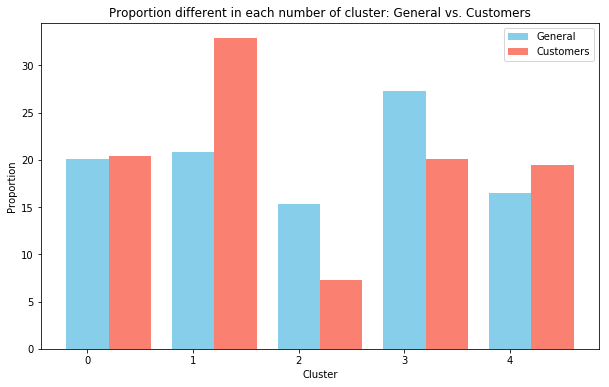

In [50]:
# Create the plot to compare the two datasets, red bar represents customers and blue for general population

bar_width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Cluster'], comparison_df['General'], bar_width, label='General', color='skyblue')
plt.bar(comparison_df['Cluster'] + bar_width, comparison_df['Customers'], bar_width, label='Customers', color='salmon')

plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Proportion different in each number of cluster: General vs. Customers')
plt.legend()

plt.show()

In [51]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# From the chart above the cluster 2 as index [1] is overrepresented - that type of individuals could be a potential customers.
# (The proportion of customers significantly higher than the general population)

# Retrieves the centroid of the second cluster
cluster_2_centroid_pca = final_model.cluster_centers_[1]


In [52]:
# Inverts the reshaped centroid back to the principle components
inverted_pca_cluster_2 = pca_final.inverse_transform(cluster_2_centroid_pca.reshape(1, -1))

In [53]:
# Inverts the cluster 2nd principle component back to the original features
cluster_2_centroid_original = scaler.inverse_transform(inverted_pca_cluster_2)

In [54]:
# Convert to dataframe with feature names
cluster_2_df = pd.DataFrame(cluster_2_centroid_original, columns=df_general.columns)
cluster_2_df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,PRAEGENDE_DECADE,PRAEGENDE_MOVEMENT,WEALTH_LEVEL,LIFE_STAGE
0,3.641097,1.009375,4.918797,1.1542,4.823715,1.069678,1.742509,2.221522,0.960393,1.767855,8.3858,4.209423,5.014979,4.521763,3.604364,4.095058,6.366321,5.967119,3.961288,4.837821,2.437004,2.796513,3.239236,2.248239,2.74636,3.001253,2.652243,0.04075,2.121761,4.309834,8.894692,1.414072,0.045671,2.038052,3.208181,1992.375091,2.837132,1.18864,0.055655,0.010762,4.036425,3.949261,4.236767,4.512455,3.999063,1.982764,4.14867,3.164559,3.15947,688.545277,2.717584,2.718867,1.327583,0.459499,3.718413,3.815926,2.931548,5.532946,3.028222,0.233356,0.236589,0.122092,0.135055,0.07301,0.109488,0.04146,0.037816,0.011134,0.658351,0.042684,0.26416,0.028528,0.000675,0.005603,0.308743,0.22486,0.08485,0.381547,0.001974,0.00076,0.040369,0.001731,0.001025,0.038668,0.127745,0.000899,0.020754,0.766076,0.178569,0.248688,0.000307,0.00112,0.00356,0.000685,0.006978,0.029979,0.01594,0.313453,0.20072,0.046977,0.009919,0.113939,0.122256,0.139424,0.037289,0.1201,0.144443,0.016883,0.19995,0.04036,0.008458,-0.000911,0.229003,0.006012,-0.000178,0.587807,0.178267,0.175758,0.244655,0.2043,0.202112,0.12316,0.050015,1954.813522,0.960393,2.03557,3.763213


In [55]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# The chart shows the third cluster at index [2]  is underrepresented 
# (The type of individuals in the cluster less likely to become a customer).

# Retrieves the centroid of the third cluster
cluster_3_centroid_pca = final_model.cluster_centers_[2]

# Inverts the reshaped centroid back to the principle components
inverted_pca_cluster_3 = pca_final.inverse_transform(cluster_3_centroid_pca.reshape(1, -1))

# Inverts the cluster 3nd principle component back to the original features
cluster_3_centroid_original = scaler.inverse_transform(inverted_pca_cluster_3)

# Convert to dataframe with feature names
cluster_3_df = pd.DataFrame(cluster_3_centroid_original, columns=df_general.columns)
cluster_3_df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_GROB,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,PRAEGENDE_DECADE,PRAEGENDE_MOVEMENT,WEALTH_LEVEL,LIFE_STAGE
0,2.48297,1.429691,3.214712,3.367102,2.558775,3.412089,3.676785,2.152193,0.443127,2.299168,6.992805,2.855199,4.520496,4.356656,4.417263,4.16639,4.648585,3.977353,3.994381,4.671562,4.262172,4.201507,4.70034,4.016338,4.689055,4.194475,2.418,0.014608,3.859653,2.677267,7.94923,5.074569,0.045865,2.692334,2.973898,1992.642547,1.90292,1.374521,0.443006,0.167126,3.469674,4.209008,3.960371,4.66412,3.734344,2.562613,3.409062,4.149781,4.229952,646.574942,2.372945,2.825614,1.514202,0.625365,3.657631,3.50887,2.890768,5.288662,3.003059,0.078125,0.122935,0.122809,0.165588,0.097103,0.133452,0.10284,0.112225,0.064924,0.290152,0.089802,0.05995,0.431268,0.086777,0.042051,0.19652,0.34611,0.264697,0.192674,0.148968,0.082048,0.099247,0.064544,0.065149,0.062633,0.039207,0.017166,0.154636,0.266401,0.242256,0.10976,0.008447,0.020943,0.01851,0.050629,0.106502,0.046574,0.02509,0.216688,0.154601,0.072341,0.148896,0.059828,0.041199,0.05433,0.020295,0.018823,0.097421,0.143063,0.146634,0.073002,0.12417,0.233863,0.04673,0.189055,0.156222,0.062776,0.311354,0.052317,0.046892,0.173639,0.390779,0.176089,0.160284,1985.549346,0.443127,2.85238,2.979991


## Discussion 3.3: Compare Customer Data to Demographics Data


The comparison chart between the Customer and general population in clusters shows a significant difference in the proportion of **the third** and **the fourth cluster**:
 * The **third cluster** in index 2 in the chart captured the **underrepresented** customers compared with the general population in Germany; the proportion of existing customers is ~7%, while there is ~15% of the population with these characteristics. The company will be less likely to get customers from this segment, which are: 
    * **ALTERSKATEGORIE_GROB (~2.5)**: People in the age of 30 to 60 years old
    * **GREEN_AVANTGARDE (~ 0.4):** People not a member in environmental sustainability
    * **LP_LEBENSPHASE_GROB (~ 7.0):** People as a single low-income and average earner families.
    * **PRAEGENDE_DECADE (~ 1985):** People growing up in in the 80s
    * **PRAEGENDE_MOVEMENT (~0.4):** People mainstream as traditional or conventional movements.
    * **WEALTH_LEVEL (~2.8):** People who are considered in the prosperous households and comfortable households.
    * **LIFE_STAGE (~2.9):** Young couples with children and school age children. 
    ---
 * The **second cluster** in index 1 from the chart indicated the **overrepresentation** of customers; the customer proportion is ~32%, while the general population is just around 20%. The company should increase the strategy to reach people in this segment who have the following characteristics:
    * **ALTERSKATEGORIE_GROB (~3.6 ):** People in the age 46 and older.
    * **GREEN_AVANTGARDE (~1):** People are a member in environmental sustainability
    * **LP_LEBENSPHASE_GROB (~ 8.3):** People in the high-income earner families
    * **PRAEGENDE_DECADE (~ 1954):** People growing up in in the 50s
    * **PRAEGENDE_MOVEMENT (~1):** People are an avantgrade (progressive, unconventional movement. 
    * **WEALTH_LEVEL (~2):** People who are considered in the prosperous households.
    * **LIFE_STAGE (~3.7):** Families with school age children and older family.  
    
    
#### Conclusion: The mail-order company should run marketing campaigns with the main target people in Germany with the characteristics of people in the fourth cluster capturing. 

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.